# 神经网络

In [1]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("data/", one_hot = True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting data/t10k-images-idx3-ubyte.gz
Extracting data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


参数设置

In [2]:
numClasses = 10
inputSize = 784
numHiddenUnits = 50
trainingIterations = 10000
batchSize = 100

In [3]:
X = tf.placeholder(tf.float32, shape = [None, inputSize])
y = tf.placeholder(tf.float32, shape = [None, numClasses])

参数初始化

In [4]:
W1 = tf.Variable(tf.truncated_normal([inputSize, numHiddenUnits], stddev = 0.1))
B1 = tf.Variable(tf.constant(0.1), [numHiddenUnits])
W2 = tf.Variable(tf.truncated_normal([numHiddenUnits, numClasses], stddev = 0.1))
B2 = tf.Variable(tf.constant(0.1), [numClasses])

网络结构

In [5]:
hiddenLayerOutput = tf.matmul(X, W1) + B1
hiddenLayerOutput = tf.nn.relu(hiddenLayerOutput)
finalOutput = tf.matmul(hiddenLayerOutput, W2) + B2
finalOutput = tf.nn.relu(finalOutput)

网络迭代

In [6]:
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels = y, logits = finalOutput))
opt = tf.train.GradientDescentOptimizer(learning_rate = .1).minimize(loss)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See @{tf.nn.softmax_cross_entropy_with_logits_v2}.



In [7]:
correct_prediction = tf.equal(tf.argmax(finalOutput, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

In [8]:
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

for i in range(trainingIterations):
    batch = mnist.train.next_batch(batchSize)
    batchInput = batch[0]
    batchLabels = batch[1]
    _, trainingLoss = sess.run([opt, loss], feed_dict = {X: batchInput, y: batchLabels})
    if i % 1000 == 0:
        trainAccuracy = accuracy.eval(session = sess, feed_dict = {X: batchInput, y: batchLabels})
        print("step %d, training accuracy %g " % (i, trainAccuracy))

step 0, training accuracy 0.15 
step 1000, training accuracy 0.88 
step 2000, training accuracy 0.87 
step 3000, training accuracy 0.9 
step 4000, training accuracy 0.97 
step 5000, training accuracy 0.95 
step 6000, training accuracy 0.98 
step 7000, training accuracy 0.96 
step 8000, training accuracy 0.97 
step 9000, training accuracy 0.99 


加一层

In [9]:
numHiddenUnitsLayers = 100
trainingIterations = 10000

X = tf.placeholder(tf.float32, shape = [None, inputSize])
y = tf.placeholder(tf.float32, shape = [None, numClasses])

W1 = tf.Variable(tf.random_normal([inputSize, numHiddenUnits], stddev = 0.1))
B1 = tf.Variable(tf.constant(0.1), [numHiddenUnits])
W2 = tf.Variable(tf.random_normal([numHiddenUnits, numHiddenUnitsLayers], stddev=0.1))
B2 = tf.Variable(tf.constant(0.1), [numHiddenUnitsLayers])
W3 = tf.Variable(tf.random_normal([numHiddenUnitsLayers, numClasses], stddev=0.1))
B3 = tf.Variable(tf.constant(0.1), [numClasses])

hiddenLayerOutput = tf.matmul(X, W1) + B1
hiddenLayerOutput = tf.nn.relu(hiddenLayerOutput)
hiddenLayer2Output = tf.matmul(hiddenLayerOutput, W2) + B2
hiddenLayer2Output = tf.nn.relu(hiddenLayer2Output)
finalOutput = tf.matmul(hiddenLayer2Output, W3) + B3

loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels = y, logits = finalOutput))
opt = tf.train.GradientDescentOptimizer(learning_rate = .1).minimize(loss)

correct_prediction = tf.equal(tf.argmax(finalOutput, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))


sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init)

for i in range(trainingIterations):
    batch = mnist.train.next_batch(batchSize)
    batchInput = batch[0]
    batchLabels = batch[1]
    _, trainingLoss = sess.run([opt, loss], feed_dict = {X: batchInput, y: batchLabels})
    if i % 1000 == 0:
        train_accuracy = accuracy.eval(session=sess, feed_dict={X: batchInput, y: batchLabels})
        print("step %d, training accuracy %g" % (i, train_accuracy))
        
testInputs = mnist.test.images
testLabels = mnist.test.labels
acc = accuracy.eval(session = sess, feed_dict = {X: testInputs, y: testLabels})
print("testing accuracy: {}".format(acc))


step 0, training accuracy 0.07
step 1000, training accuracy 0.99
step 2000, training accuracy 0.98
step 3000, training accuracy 0.97
step 4000, training accuracy 0.98
step 5000, training accuracy 0.99
step 6000, training accuracy 1
step 7000, training accuracy 0.98
step 8000, training accuracy 1
step 9000, training accuracy 1
testing accuracy: 0.9746000170707703


# 卷积神经网络

In [10]:
import tensorflow as tf
import random
import numpy as np
import matplotlib.pyplot as plt
import datetime
%matplotlib inline

In [11]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("data/", one_hot=True)

Extracting data/train-images-idx3-ubyte.gz
Extracting data/train-labels-idx1-ubyte.gz
Extracting data/t10k-images-idx3-ubyte.gz
Extracting data/t10k-labels-idx1-ubyte.gz


In [12]:
tf.reset_default_graph()
sess = tf.InteractiveSession()
x = tf.placeholder("float", shape = [None, 28, 28, 1]) # 后三个代表图片的高度、宽度以及通道数
y_ = tf.placeholder("float", shape = [None, 10]) #10为类型数

In [13]:
W_conv1 = tf.Variable(tf.truncated_normal([5, 5, 1, 32], stddev = 0.1)) #5,5 表示过滤器的大小，1表示输入的通道数，32表示过滤器的大小
b_conv1 = tf.Variable(tf.constant(.1, shape = [32])) # 偏置参数只需要满足通道数相同就行了 

In [14]:
h_conv1 = tf.nn.conv2d(input = x, filter = W_conv1, strides = [1, 1, 1, 1], padding = 'SAME') + b_conv1
h_conv1 = tf.nn.relu(h_conv1)
h_pool1 = tf.nn.max_pool(h_conv1, ksize = [1, 2, 2, 1], strides = [1, 2, 2, 1], padding = 'SAME')


In [15]:
def conv2d(x, W):
    return tf.nn.conv2d(input = x, filter = W, strides = [1, 1, 1, 1], padding = 'SAME')

def max_pool_2_by_2(x):
    return tf.nn.max_pool(x, ksize = [1, 2, 2, 1], strides = [1, 2, 2, 1], padding = 'SAME')

In [16]:
# Second Conv and Pool Layers
W_conv2 = tf.Variable(tf.truncated_normal([5, 5, 32, 64], stddev = 0.1))
b_conv2 = tf.Variable(tf.constant(.1, shape = [64]))
h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
h_pool2 = max_pool_2_by_2(h_conv2)

# First Fully Connected Layer
W_fc1 = tf.Variable(tf.truncated_normal([7 * 7 * 64, 1024], stddev = 0.1))
b_fc1 = tf.Variable(tf.constant(.1, shape = [1024]))
h_pool2_flat = (h_pool2, [-1, 7 * 7 * 64]) # -1 表示自动计算出合适的值，这里计算结果为1
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)

# Dropout Layer
keep_prob = tf.placeholder("float")
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

# Second Fully Connected Layer
W_fc2 = tf.Variable(tf.truncated_normal([1024, 10], stddev = 0.1))
b_fc2 = tf.Variable(tf.constant(.1, shape = [10]))

# Final Layer
y = tf.matmul(h_fc1_drop, W_fc2) + b_fc2

In [17]:
crossEntropyLoss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels = y_, logits = y))
trainStep = tf.train.AdamOptimizer().minimize(crossEntropyLoss)
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

In [18]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

batchSize = 50
for i in range(1000):
    batch = mnist.train.next_batch(batchSize)
    trainingInputs = batch[0].reshape([batchSize, 28, 28, 1])
    trainingLabels = batch[1]
    if i % 100 == 0:
        trainAccuracy = accuracy.eval(session = sess, feed_dict = {x:trainingInputs, y_: trainingLabels, keep_prob: 1.0})
        print("step %d, training accuracy %g" % (i, trainAccuracy))
    trainStep.run(session = sess, feed_dict = {x: trainingInputs, y_: trainingLabels, keep_prob: 0.5})

step 0, training accuracy 0.06
step 100, training accuracy 0.94
step 200, training accuracy 0.94
step 300, training accuracy 0.96
step 400, training accuracy 0.98
step 500, training accuracy 0.98
step 600, training accuracy 0.98
step 700, training accuracy 0.98
step 800, training accuracy 1
step 900, training accuracy 0.98


# $Cifar$图像分类识别任务

In [24]:
import pickle

def unpickle(file):
    fo = open(file, 'rb')
    dict = pickle.load(fo, encoding='latin1')
    fo.close()
    return dict

In [25]:
import numpy as np

def clean(data):
    imgs = data.reshape(data.shape[0], 3, 32, 32)
    grayscale_imgs = imgs.mean(1)
    cropped_imgs = grayscale_imgs[:, 4 : 28, 4 : 28]
    img_data = cropped_imgs.reshape(data.shape[0], -1)
    img_size = np.shape(img_data)[1]
    means = np.mean(img_data, axis = 1)
    meansT = means.reshape(len(means), 1)
    stds = np.std(img_data, axis = 1)
    stdsT = stds.reshape(len(stds), 1)
    adj_stds = np.maximum(stdsT, 1.0) / np.sqrt(img_size)
    normalized = (img_data - meansT) / adj_stds
    return normalized

读取数据

In [26]:
def read_data(directory):
    names = unpickle('{}/batches.meta'.format(directory))['label_names']
    print('names', names)
    
    data, labels = [], []
    for i in range(1, 6):
        filename = '{}/data_batch_{}'.format(directory, i)
        batch_data = unpickle(filename)
        if len(data) > 0:
            data = np.vstack((data, batch_data['data']))
            labels = np.hstack((labels, batch_data['labels']))
        else:
            data = batch_data['data']
            labels = batch_data['labels']
            
    print(np.shape(data), np.shape(labels))
    
    data = clean(data)
    data = data.astype(np.float32)
    return names, data, labels

显示数据

names ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
(50000, 3072) (50000,)
data.shape = (50000, 576)


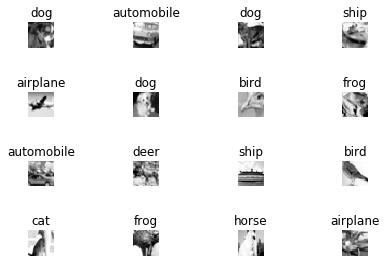

In [31]:
%matplotlib inline
import matplotlib.pyplot as plt
import random
random.seed(1)

name, data, labels = read_data('./cifar-10-batches-py')
print("data.shape = " + str(data.shape))

def show_some_examples(name, data, labels):
    plt.figure()
    rows, cols = 4, 4
    randoms_idxs = random.sample(range(len(data)), rows * cols)
    for i in range(rows * cols):
        plt.subplot(rows, cols, i + 1)
        j = randoms_idxs[i]
        plt.title(name[labels[j]])
        img = np.reshape(data[j, :], (24, 24))
        plt.imshow(img, cmap = 'Greys_r')
        plt.axis('off')
    plt.tight_layout()
    plt.savefig('cifar_example.png')
    
show_some_examples(name, data, labels)

看看中间过程

In [36]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

names, data, labels = read_data('./cifar-10-batches-py')

def show_conv_results(data, filename=None):
    plt.figure()
    rows, cols = 4, 8
    for i in range(np.shape(data)[3]):
        img = data[0, :, :, i]
        plt.subplot(rows, cols, i + 1)
        plt.imshow(img, cmap = 'Greys_r', interpolation = 'none')
        plt.axis('off')
    if filename:
        plt.savefig(filename)
    else:
        plt.show()
        
    plt.close
        
def show_weights(W, filename=None):
    plt.figure()
    rows, cols = 4, 8
    for i in range(np.shape(W)[3]):
        img = W[:, :, 0, i]
        plt.subplot(rows, cols, i + 1)
        plt.imshow(img, cmap = 'Greys_r', interpolation = 'none')
        plt.axis('off')
    if filename:
        plt.savefig(filename)
    else:
        plt.show()
        
    plt.close

names ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
(50000, 3072) (50000,)


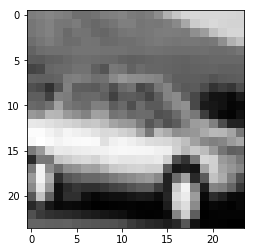

<function matplotlib.pyplot.close(*args)>

In [37]:
raw_data = data[4, :]
raw_img = np.reshape(raw_data, (24, 24))
plt.figure()
plt.imshow(raw_img, cmap='Greys_r')
plt.show()
plt.close

In [38]:
x = tf.reshape(raw_data, shape = [-1, 24, 24, 1])
W = tf.Variable(tf.random_normal([5, 5, 1, 32]))
b = tf.Variable(tf.random_normal([32]))

conv = tf.nn.conv2d(x, W, strides = [1, 1, 1, 1], padding = 'SAME')
conv_with_b = tf.nn.bias_add(conv, b)
conv_out = tf.nn.relu(conv_with_b)

k = 2
maxpool = tf.nn.max_pool(conv_out, ksize = [1, k, k, 1], strides = [1, k, k, 1], padding = 'SAME')

weights:


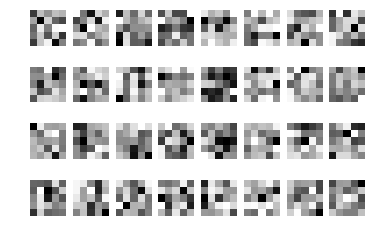

convolution results:
(1, 24, 24, 32)


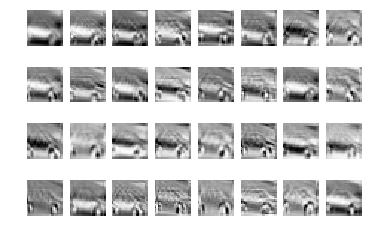

maxpool after all the convolutions:
(1, 12, 12, 32)


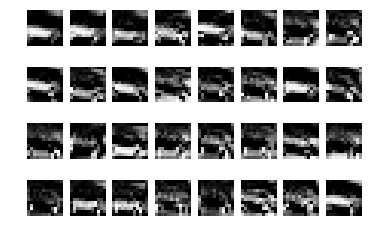

In [40]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    W_val = sess.run(W)
    print('weights:')
    show_weights(W_val)
    
    conv_val = sess.run(conv)
    print('convolution results:')
    print(np.shape(conv_val))
    show_conv_results(conv_val)
    
    maxpool_val = sess.run(maxpool)
    print('maxpool after all the convolutions:')
    print(np.shape(maxpool_val))
    show_conv_results(maxpool_val)

构建完整网络模型

In [41]:
x = tf.placeholder(tf.float32, [None, 24 * 24])
y = tf.placeholder(tf.float32, [None, len(names)])
W1 = tf.Variable(tf.random_normal([5, 5, 1, 64]))
b1 = tf.Variable(tf.random_normal([64]))
W2 = tf.Variable(tf.random_normal([5, 5, 64, 64]))
b2 = tf.Variable(tf.random_normal([64]))
W3 = tf.Variable(tf.random_normal([6*6*64, 1024]))
b3 = tf.Variable(tf.random_normal([1024]))
W_out = tf.Variable(tf.random_normal([1024, len(names)]))
b_out = tf.Variable(tf.random_normal([len(names)]))

In [42]:
def conv_layer(x, W, b):
    conv = tf.nn.conv2d(x, W, strides = [1, 1, 1, 1], padding = 'SAME')
    conv_with_b = tf.nn.bias_add(conv, b)
    conv_out = tf.nn.relu(conv_with_b)
    return conv_out


def maxpool_layer(conv, k = 2):
    return tf.nn.max_pool(conv, ksize = [1, k, k, 1], strides = [1, k, k, 1], padding = 'SAME')


In [43]:
def model():
    x_reshape = tf.reshape(x, shape = [-1, 24, 24, 1])
    
    conv_out1 = conv_layer(x_reshape, W1, b1)
    maxpool_out1 = maxpool_layer(conv_out1)
    #提出了LRN层，对局部神经元的活动创建竞争机制，使得其中响应比较大的值变得相对更大，并抑制其他反馈较小的神经元，增强了模型的泛化能力。
    #推荐阅读http://blog.csdn.net/banana1006034246/article/details/75204013
    norm1 = tf.nn.lrn(maxpool_out1, 4, bias = 1.0, alpha = 0.001 / 9.0, beta = 0.75)
    conv_out2 = conv_layer(norm1, W2, b2)
    norm2 = tf.nn.lrn(conv_out2, 4, bias = 1.0, alpha = 0.001 / 9.0, beta = 0.75)
    maxpool_out2 = maxpool_layer(norm2)
    
    maxpool_reshaped = tf.reshape(maxpool_out2, [-1, W3.get_shape().as_list()[0]])
    local = tf.add(tf.matmul(maxpool_reshaped, W3), b3)
    local_out = tf.nn.relu(local)
    
    out = tf.add(tf.matmul(local_out, W_out), b_out)
    return out

In [44]:
learning_rate = 0.001
model_op = model()

cost = tf.reduce_mean(
    tf.nn.softmax_cross_entropy_with_logits(logits=model_op, labels=y)
)
train_op = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

correct_pred = tf.equal(tf.argmax(model_op, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

In [45]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    onehot_labels = tf.one_hot(labels, len(names), axis = -1)
    onehot_vals = sess.run(onehot_labels)
    batch_size = 64
    print('batch size', batch_size)
    for j in range(0, 1000):
        avg_accuracy_val = 0.
        batch_count = 0.
        for i in range(0, len(data), batch_size):
            batch_data = data[i:i+batch_size, :]
            batch_onehot_vals = onehot_vals[i:i+batch_size, :]
            _, accuracy_val = sess.run([train_op, accuracy], feed_dict = {x: batch_data, y: batch_onehot_vals})
            avg_accuracy_val += accuracy_val
            batch_count += 1.
        avg_accuracy_val /= batch_count
        print('Epoch {}. Avg accuracy {}'.format(j, avg_accuracy_val))

batch size 64
Epoch 0. Avg accuracy 0.2116568094629156


KeyboardInterrupt: 